# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Support Vector Machines (SVM) - Explaining Hyper Parameters</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)
<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

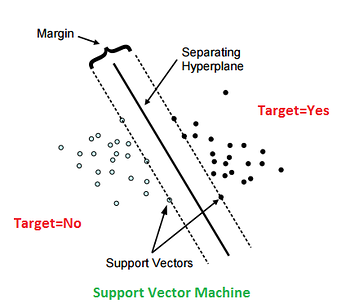

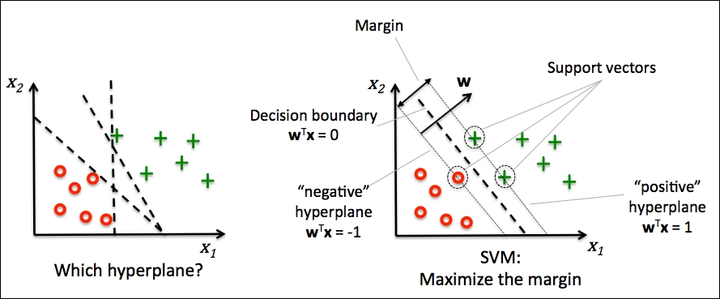

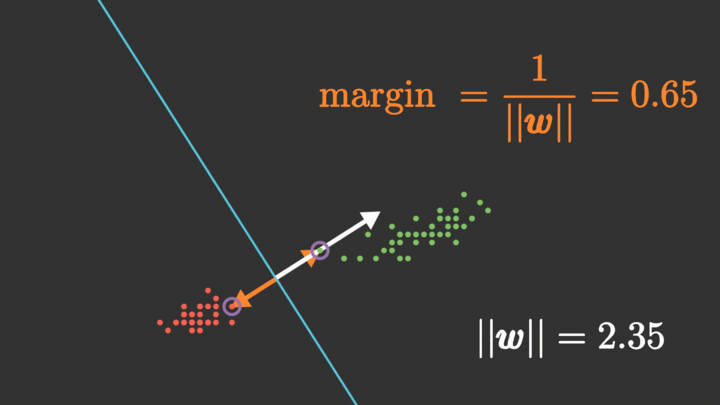

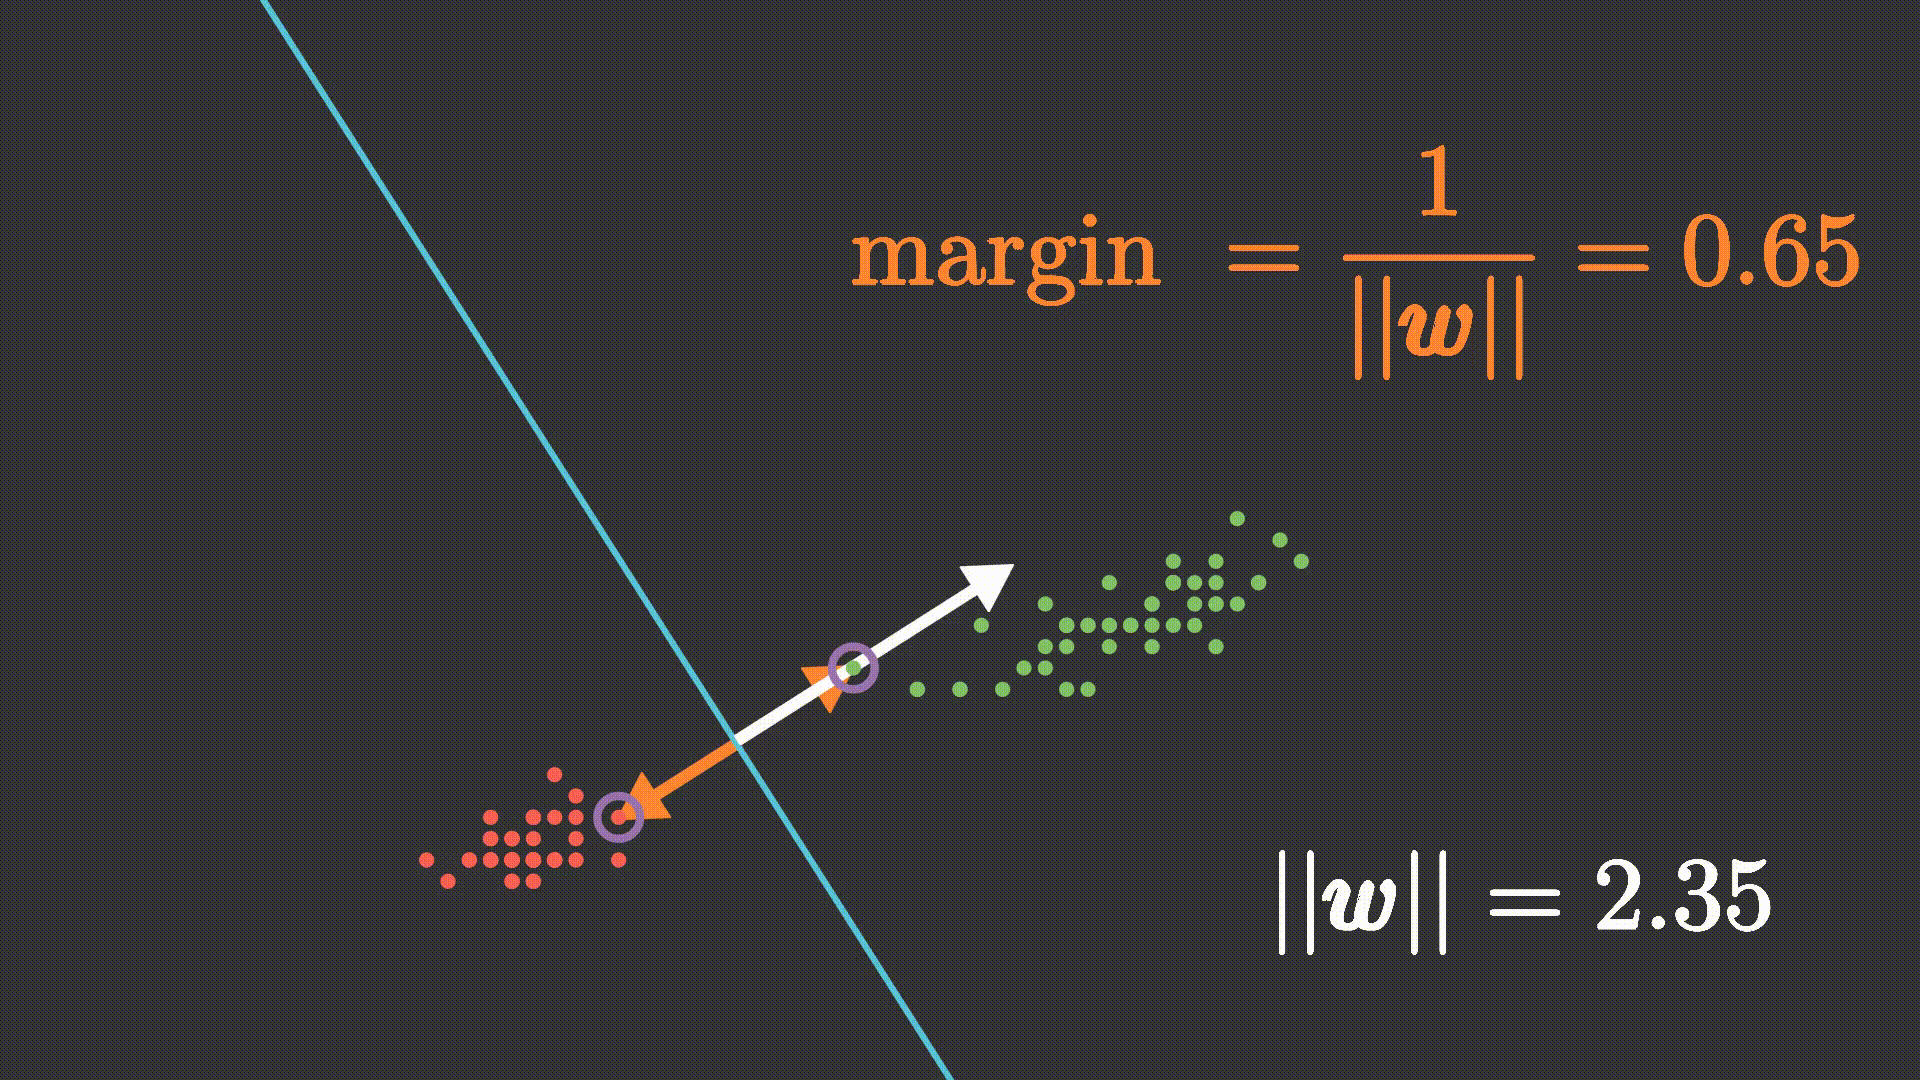

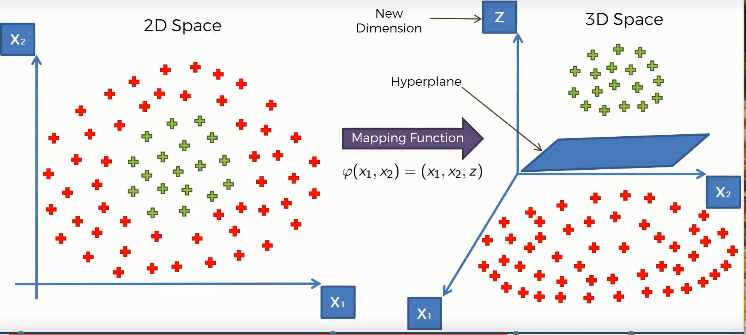

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)  

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")
df                                             # aim is 1 to finden

Med_1_mL  Med_2_mL  Virus Present
0       6.508     8.583              0
1       4.126     3.073              1
2       6.428     6.370              0
3       3.673     4.905              1
4       1.580     2.441              1
..        ...       ...            ...
395     2.884     3.272              1
396     7.291     9.489              0
397     7.895     8.273              0
398     2.691     2.675              1
399     7.588     9.474              0

[400 rows x 3 columns]

In [3]:
df.shape

(400, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


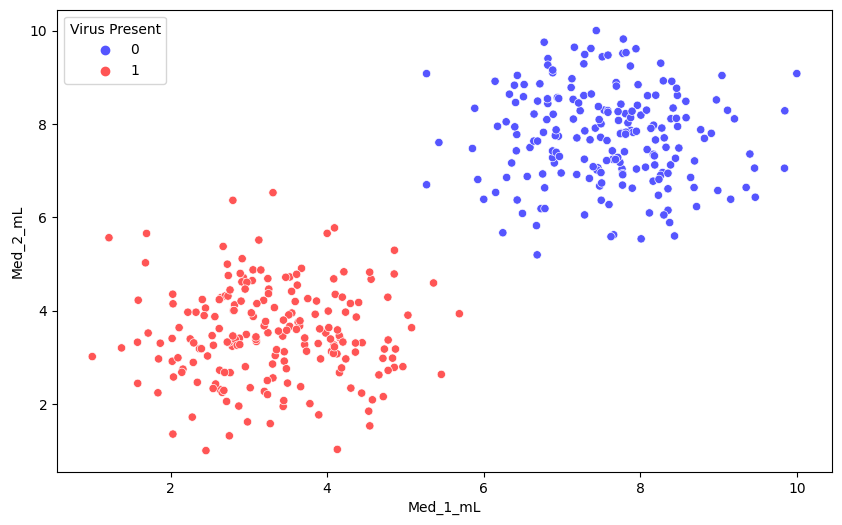

In [5]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", data = df, hue="Virus Present", palette="seismic");

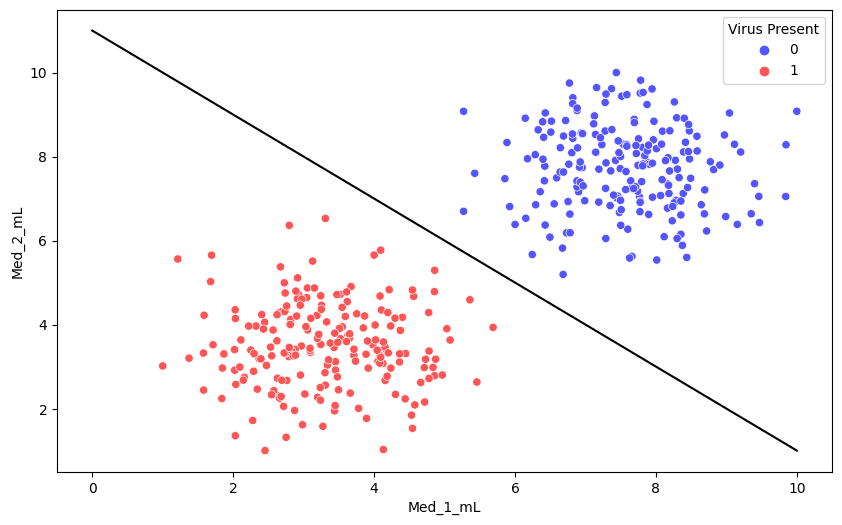

In [6]:
sns.scatterplot(x = "Med_1_mL", y = "Med_2_mL", hue = "Virus Present",data = df, palette = "seismic")
x = np.linspace(0, 10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y, "black");

# SVM - Support Vector Machine

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [9]:
X = df.drop("Virus Present", axis = 1)
y = df["Virus Present"]

In [10]:
model = SVC(kernel="linear", C=1.0)

In [11]:
model.fit(X, y)

SVC(kernel='linear')

In [12]:
from svm_margin_plot import plot_svm_boundary

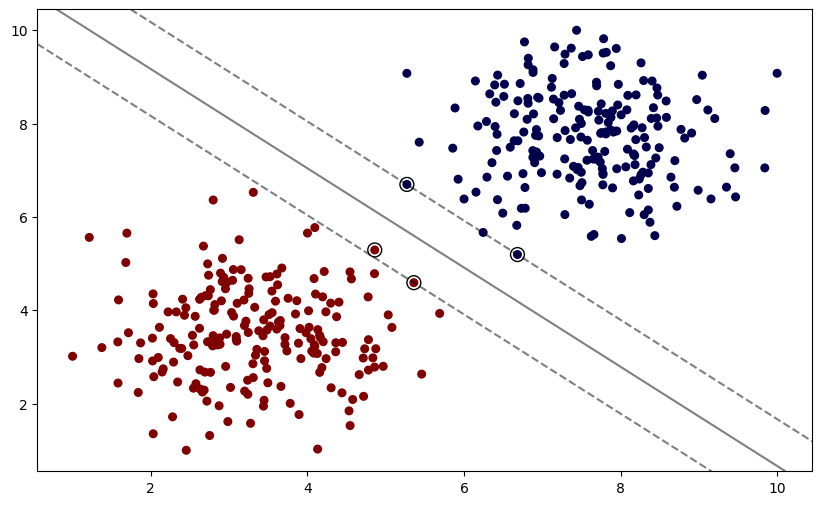

In [13]:
plot_svm_boundary(model, X, y);

In [14]:
model = SVC(kernel="linear", C=0.01)

model.fit(X, y)

SVC(C=0.01, kernel='linear')

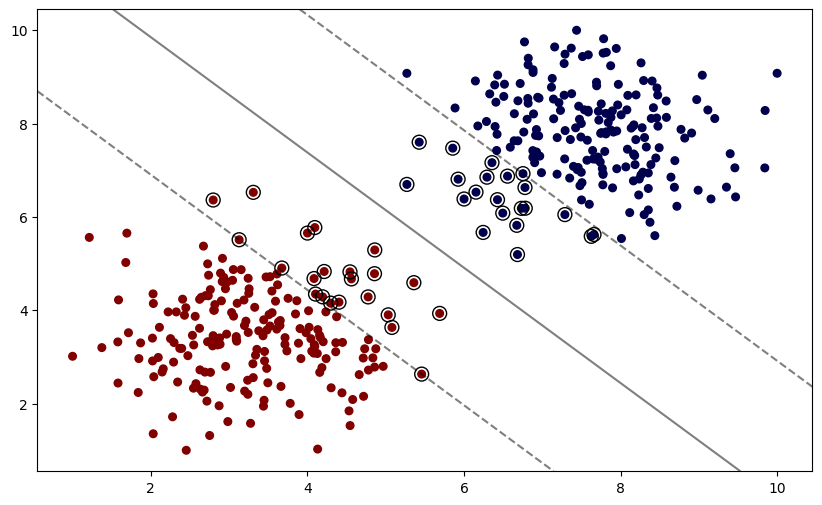

In [15]:
plot_svm_boundary(model, X, y);

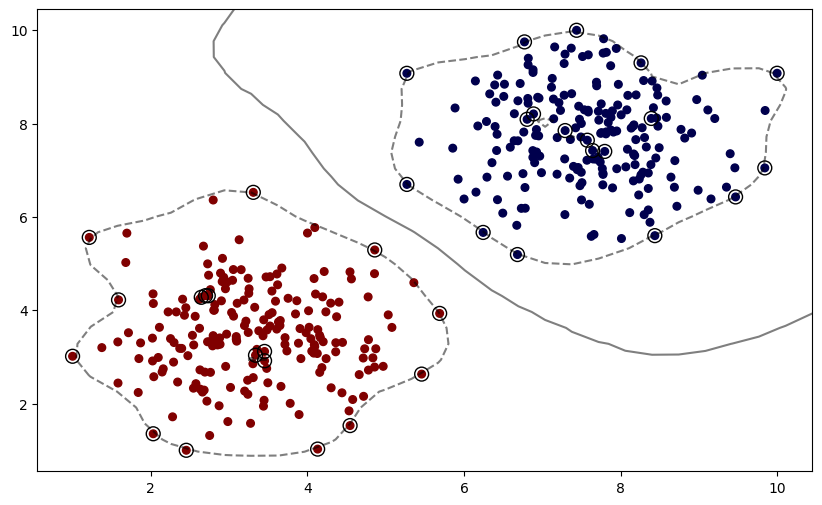

In [16]:
model = SVC(kernel="rbf", C=10, gamma=0.5)

model.fit(X, y)             # c de gamma da büyük olunca overfit olur!!

plot_svm_boundary(model, X, y);

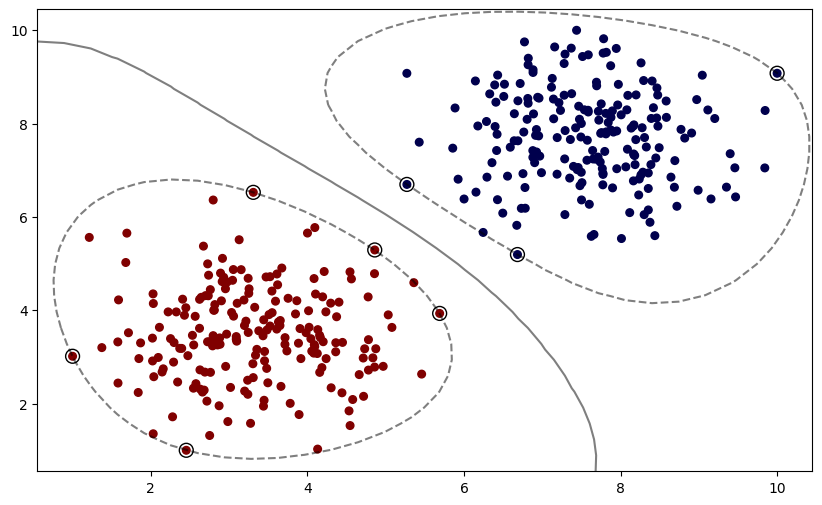

In [17]:
model = SVC(kernel="rbf", C=10, gamma=0.1)

model.fit(X, y) # yuksek gamada harekat kabiliyeti azalır bu da overfit yapar

plot_svm_boundary(model, X, y);

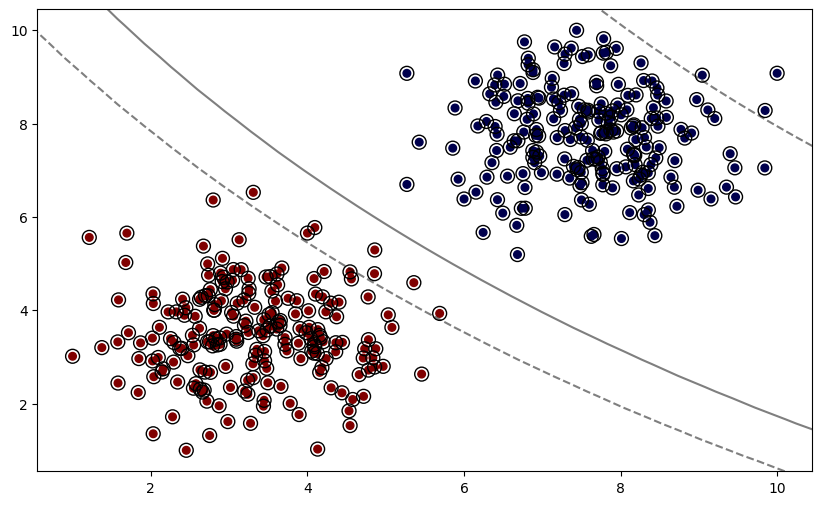

In [18]:
model = SVC(kernel="sigmoid")  # uygun degil

model.fit(X, y)

plot_svm_boundary(model, X, y);

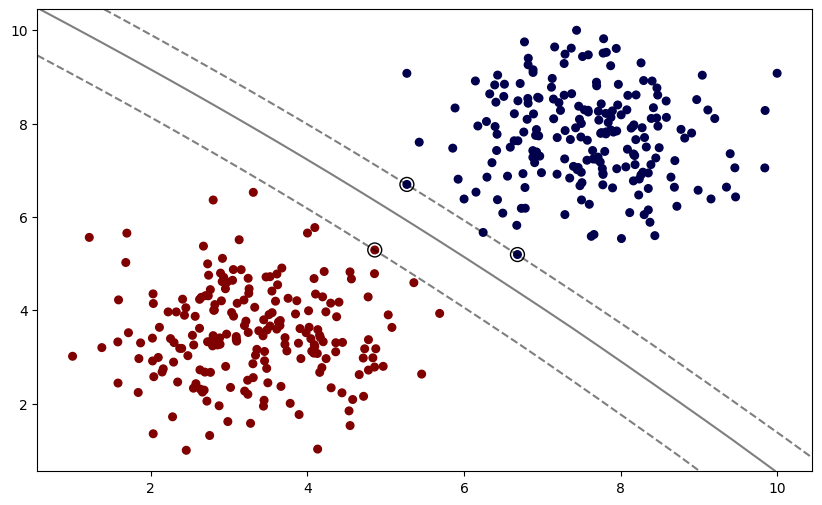

In [19]:
model = SVC(kernel="poly", degree=5) # degree=3 default
 
model.fit(X, y)

plot_svm_boundary(model, X, y);

# Grid Search, important 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2,3,4,5]}
grid = GridSearchCV(svm,param_grid)

In [22]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [23]:
grid.best_params_  # hayper parameters

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}